## Observations and Insights 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# print(mouse_metadata.head())
# print(study_results.head())
mouse_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
mouse_data_df.rename(columns={"Mouse ID": "MouseID"})
mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [52]:
# Checking the number of mice in the DataFrame.
count = mouse_data_df['Mouse ID']
count.size

1893

In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [54]:
# Optional: Get all the data for the duplicate mouse ID. 


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_df = mouse_data_df.drop_duplicates()

In [56]:
# Checking the number of mice in the clean DataFrame.
count_new = mouse_data_df['Mouse ID'].unique()
count_new.size

249

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Testing for data representation
# regimens = mouse_data_df['Drug Regimen'].unique()
# regimens

mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])




# This method is the most straighforward, creating multiple series and putting them all together at the end.

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

Text(0, 0.5, 'Number of mice')

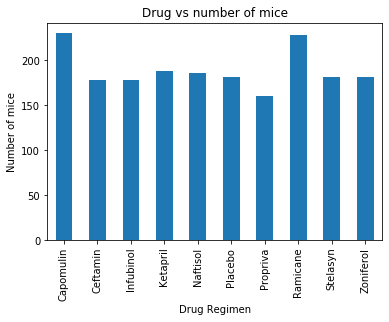

In [59]:
count_per_drug = mouse_data_df.groupby('Drug Regimen')['Timepoint'].count()
plotting = count_per_drug.plot.bar(title="Drug vs number of mice")
plotting.set_ylabel("Number of mice")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

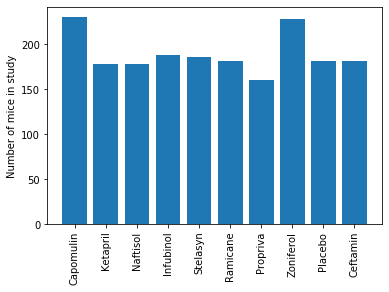

In [60]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drugs = mouse_data_df["Drug Regimen"].unique()

# THis prints out the data I want
#for mice in count_per_drug:
#    print(mice)

num_drugs = len(drugs)
mice_value = [None] * num_drugs
count_mice = 0
for mice in count_per_drug:
    mice_value[count_mice] = mice
    count_mice = count_mice +1
    
plt.ylabel("Number of mice in study")
plt.bar(drugs,mice_value)
plt.xticks(rotation=90)

In [61]:
count_mice = 0
for mice in count_per_drug:
    mice_value[count_mice] = mice
    count_mice = count_mice +1
        
print(mice_value)

[230, 178, 178, 188, 186, 181, 160, 228, 181, 182]


## Pie Plots

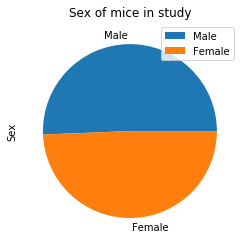

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = mouse_data_df['Sex'].value_counts()
sex_data_df = pd.DataFrame(sex_data)

sex_data_df.plot.pie(y="Sex", title="Sex of mice in study")

([<matplotlib.patches.Wedge at 0x1f15dc15608>,
 [Text(-0.6901369591455114, -0.8565693069573453, 'Male'),
  Text(0.6901370393433148, 0.8565692423420561, 'Female')],
 [Text(-0.3764383413520971, -0.4672196219767338, '50.6%'),
  Text(0.37643838509635347, 0.46721958673203057, '49.4%')])

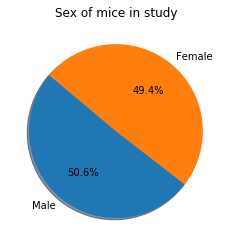

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = mouse_data_df['Sex'].value_counts()
labels = ["Male","Female"]
plt.title("Sex of mice in study")
plt.pie(sizes, labels=labels, shadow=True, autopct="%1.1f%%",startangle=140)

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
bestDrugs = ["Capomulin", "Ramicane", "Infubinol" , "Ceftamin"]



# super proud of this 2 line statement. The .isin call! The groupby into last! Huzzah
drugs_df = mouse_data_df.loc[mouse_data_df["Drug Regimen"].isin(bestDrugs)]
drugs_grouped = drugs_df.groupby("Mouse ID")
mice_by_last_time = drugs_grouped.last()
mouse_id = ""
counter = drugs_df["Mouse ID"].count()

# Trimming data for the box plot
capomulin_df = mice_by_last_time.loc[mice_by_last_time["Drug Regimen"]=="Capomulin"]
Ramicane_df = mice_by_last_time.loc[mice_by_last_time["Drug Regimen"]=="Ramicane"]
Infubinol_df = mice_by_last_time.loc[mice_by_last_time["Drug Regimen"]=="Infubinol"]
Ceftamin_df = mice_by_last_time.loc[mice_by_last_time["Drug Regimen"]=="Ceftamin"]

# Making lists 
capomulin_df["Tumor Volume (mm3)"]


#for drug in bestDrugs:
#  print(drug)

# I know this should be in a for loop but I cannot figure out how to recursively trim the data down ATM
quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr_cap = upperq-lowerq
lower_bound = lowerq - (1.5*iqr_cap)
upper_bound = upperq + (1.5*iqr_cap)

count = 0
for tumor in capomulin_df["Tumor Volume (mm3)"]:
    if tumor < lower_bound:
        count = count + 1
    elif tumor > upper_bound:
        count = count + 1
    
print(f"capomulin has {count} outliers")

# Ramicane Outliers
quartiles = Ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr_cap)
upper_bound = upperq + (1.5*iqr_cap)
count = 0
for tumor in Ramicane_df["Tumor Volume (mm3)"]:
    if tumor < lower_bound:
        count = count + 1
    elif tumor > upper_bound:
        count = count + 1
print(f"Ramicane has {count} outliers")


# Infubinol Outliers
quartiles = Infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr_cap)
upper_bound = upperq + (1.5*iqr_cap)
count = 0
for tumor in Infubinol_df["Tumor Volume (mm3)"]:
    if tumor < lower_bound:
        count = count + 1
    elif tumor > upper_bound:
        count = count + 1
print(f"Infubinol has {count} outliers")


# Ceftamin Outliers
quartiles = Ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr_cap)
upper_bound = upperq + (1.5*iqr_cap)
count = 0
for tumor in Ceftamin_df["Tumor Volume (mm3)"]:
    if tumor < lower_bound:
        count = count + 1
    elif tumor > upper_bound:
        count = count + 1
print(f"Ceftamin has {count} outliers")


capomulin has 0 outliers
Ramicane has 0 outliers
Infubinol has 1 outliers
Ceftamin has 0 outliers


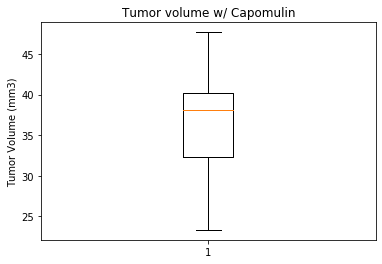

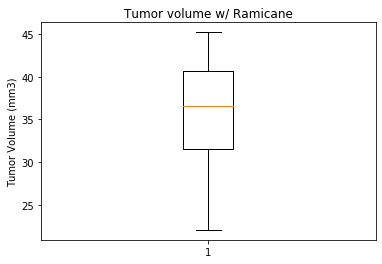

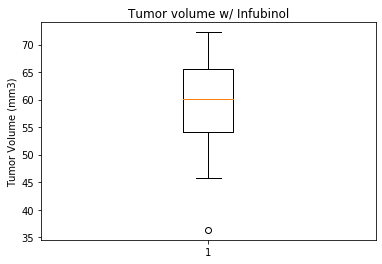

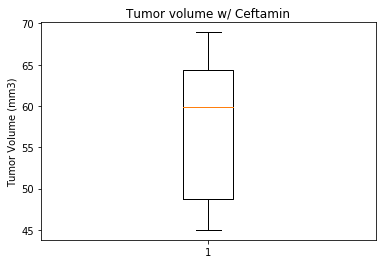

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1= plt.subplots()
fig1, ax2= plt.subplots()
fig1, ax3= plt.subplots()
fig1, ax4= plt.subplots()
ax1.boxplot(capomulin_df["Tumor Volume (mm3)"])
ax2.boxplot(Ramicane_df["Tumor Volume (mm3)"])
ax3.boxplot(Infubinol_df["Tumor Volume (mm3)"])
ax4.boxplot(Ceftamin_df["Tumor Volume (mm3)"])
    
ax1.set_title("Tumor volume w/ Capomulin")
ax2.set_title("Tumor volume w/ Ramicane")
ax3.set_title("Tumor volume w/ Infubinol")
ax4.set_title("Tumor volume w/ Ceftamin")

ax1.set_ylabel('Tumor Volume (mm3)')
ax2.set_ylabel('Tumor Volume (mm3)')
ax3.set_ylabel('Tumor Volume (mm3)')
ax4.set_ylabel('Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

In [66]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = mouse_data_df.loc[mouse_data_df["Drug Regimen"]=="Capomulin"]



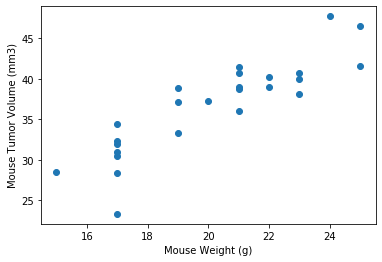

In [67]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mouse Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation of weight vs tumor volume is 0.88


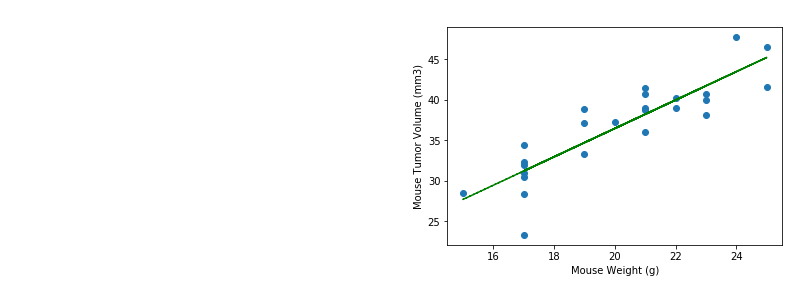

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])
print(f"Correlation of weight vs tumor volume is {round(corr[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])
lin_reg_line = capomulin_df["Weight (g)"]*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])
plt.plot(capomulin_df["Weight (g)"],lin_reg_line,"g--")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mouse Tumor Volume (mm3)')
plt.show()